### TASK 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.stats import multivariate_normal

In [147]:
# 2d histogram functions
def two_dim_hist(data, bins):
    hist, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=bins)
    hist = hist.T
    return hist, xedges, yedges

def plot_hist(hist, xedges, yedges):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, aspect='equal')
    ax.pcolormesh(xedges, yedges, hist)
    plt.title('2D Histogram')
    plt.show()

def two_dim_hist_generate_data(hist, xedges, yedges):
    data = []
    for i in range(hist.shape[0]):
        for j in range(hist.shape[1]):
            data.extend([[xedges[i], yedges[j]]] * int(hist[i, j]))
    data = np.array(data)
    return data


# single gaussian functions
def single_gaussian(data):
    mean = np.mean(data, axis=0)
    cov = np.cov(data.T)
    return mean, cov

def plot_gaussian(mean, cov, n):
    x, y = np.random.multivariate_normal(mean, cov, n).T
    plt.scatter(x, y)
    plt.title('Single Gaussian')
    plt.show()

def single_gaussian_pdf(data, mean, cov):
    return multivariate_normal.pdf(data, mean, cov)

def single_gaussian_generate_data(mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)


# gmm funcions
def gmm(data, n_components):
    n = data.shape[0]
    # initialize parameters
    weights = np.ones(n_components) / n_components
    means = np.random.rand(n_components, 2)
    covs = np.array([np.eye(2) for i in range(n_components)])
    # EM algorithm
    for i in range(100):
        # E step
        r = np.zeros((n, n_components))
        for j in range(n_components):
            r[:, j] = weights[j] * multivariate_normal.pdf(data, means[j], covs[j])
        r = r / np.sum(r, axis=1)[:, None]
        # M step
        weights = np.sum(r, axis=0) / n
        means = np.dot(r.T, data) / np.sum(r, axis=0)[:, None]
        for j in range(n_components):
            covs[j] = np.dot((r[:, j][:, None] * (data - means[j])).T, (data - means[j])) / np.sum(r[:, j])
    return weights, means, covs

def plot_gmm(weights, means, covs, n):
    for i in range(means.shape[0]):
            num_samples = int(weights[i] * n)
            x, y = np.random.multivariate_normal(means[i], covs[i], num_samples).T
            plt.scatter(x, y, alpha=0.5, label=f"Component {i+1}")
    plt.legend()
    plt.title('GMM')
    plt.show()
    

def gmm_pdf(data, weights, means, covs):
    pdf = 0
    for i in range(len(weights)):
        pdf += weights[i] * multivariate_normal.pdf(data, means[i], covs[i])
    return pdf

def gmm_generate_data(weights, means, covs, n):
    data = []
    for i in range(len(weights)):
        data.extend(single_gaussian_generate_data(means[i], covs[i], int(n * weights[i])))
    data = np.array(data)
    return data

# kde functions
def kde(data, h):
    n = data.shape[0]
    pdf = np.zeros(n)
    for i in range(n):
        pdf[i] = np.mean([multivariate_normal.pdf(data[i], data[j], h) for j in range(n)])
    return pdf

def plot_kde(data, pdf):
    plt.scatter(data[:,0], data[:,1], c=pdf)
    plt.title('KDE')
    plt.show()

def kde_generate_data(data, pdf, n):
    pdf = pdf / np.sum(pdf)  # Normalize the pdf
    return np.array([data[np.random.choice(len(data), p=pdf)] for i in range(n)])


# density plot function
def plot_density(data, density, title):
    plt.imshow(density, extent=(np.min(data[:,0]), np.max(data[:,0]), np.min(data[:,1]), np.max(data[:,1])), origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()





In [144]:
def rbf_kernel(x, y, gamma = 1):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def imq_kernel(x, y, c = 1):
    return 1 / (1 + np.linalg.norm(x - y) ** 2 / c)

def mmd(X, Y, kernel='rbf', **kwargs):
    n, m = len(X), len(Y)
    kernel_func = rbf_kernel if kernel == 'rbf' else imq_kernel
    XX = np.mean([kernel_func(x, x_prime, **kwargs) for x in X for x_prime in X])
    YY = np.mean([kernel_func(y, y_prime, **kwargs) for y in Y for y_prime in Y])
    XY = np.mean([kernel_func(x, y, **kwargs) for x in X for y in Y])
    return XX + YY - 2 * XY


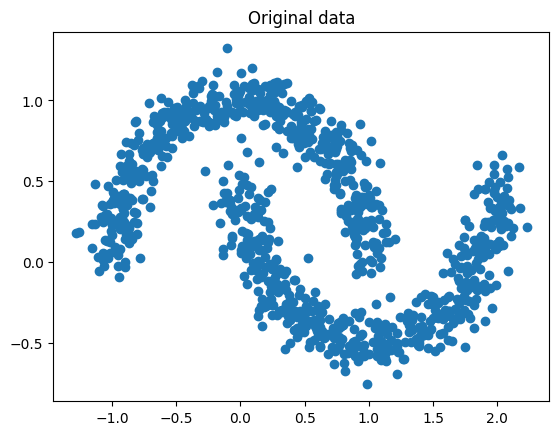



Training set size: 100


2d Histogram
MMD with RBF kernel: 0.01166993914995651
MMD with IMQ kernel: 0.009687010067817137


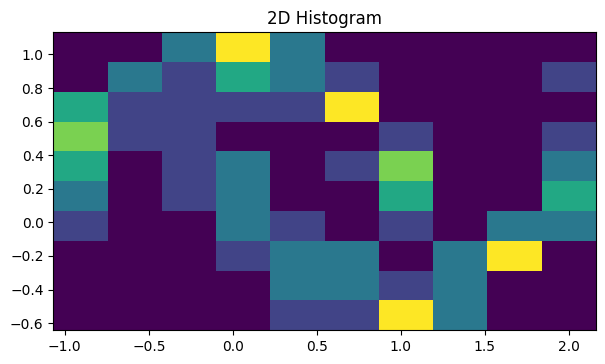



Single Gaussian
MMD with RBF kernel: 0.01600281060719655
MMD with IMQ kernel: 0.012614243188140195


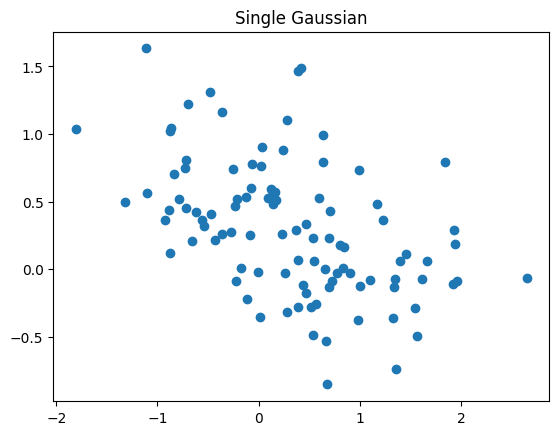



GMM


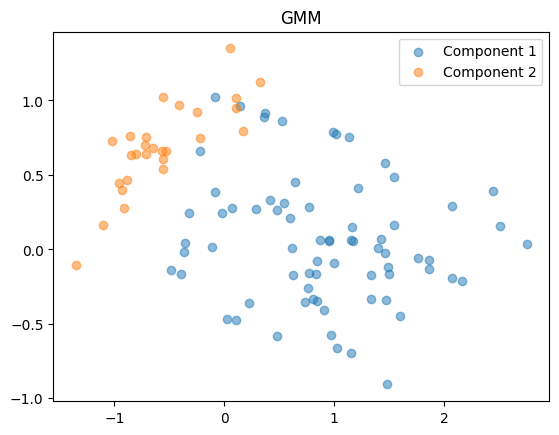

MMD with RBF kernel: 0.009187865507980009
MMD with IMQ kernel: 0.008491138535005938


KDE


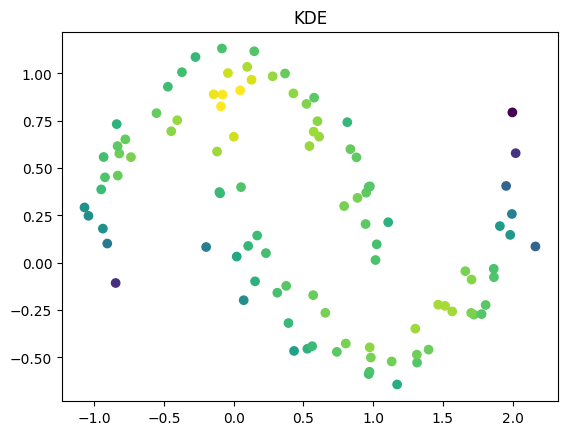

MMD with RBF kernel: 0.00745696065204049
MMD with IMQ kernel: 0.0062055847821465004


Training set size: 500


2d Histogram
MMD with RBF kernel: 0.014624051270430316
MMD with IMQ kernel: 0.012261792885163048


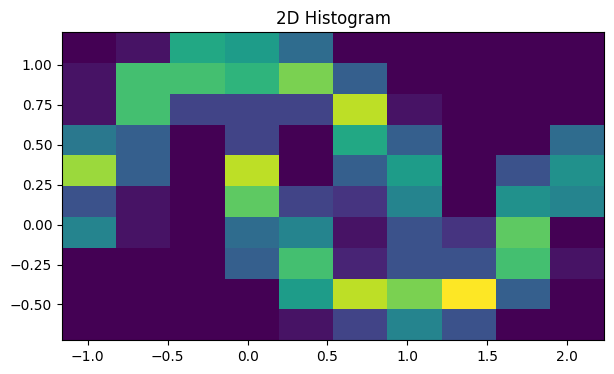



Single Gaussian
MMD with RBF kernel: 0.01570976052589479
MMD with IMQ kernel: 0.012059965040268406


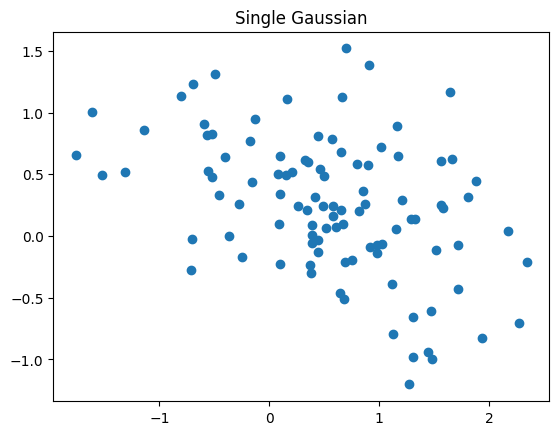



GMM


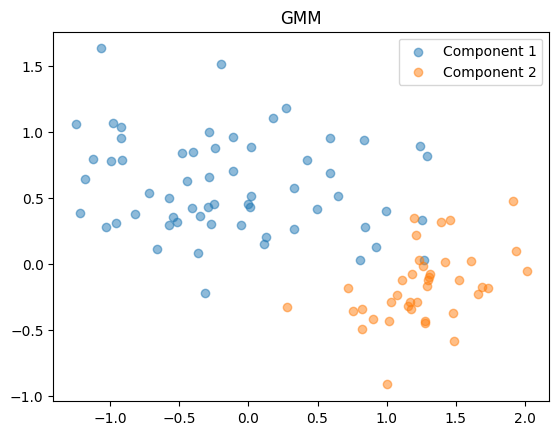

MMD with RBF kernel: 0.002568441437697744
MMD with IMQ kernel: 0.0029780881409163795


KDE


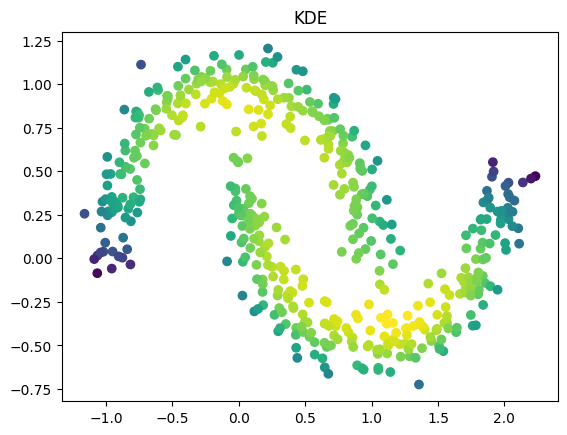

MMD with RBF kernel: 0.0014669644231017909
MMD with IMQ kernel: 0.001128433576752741


Training set size: 1500


2d Histogram
MMD with RBF kernel: 0.016524175602430025
MMD with IMQ kernel: 0.0146459131745168


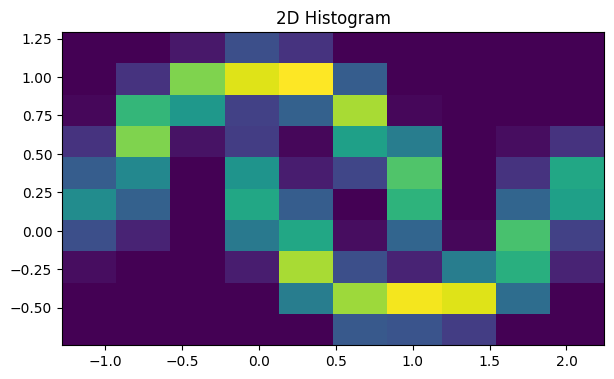



Single Gaussian
MMD with RBF kernel: 0.013112722321281578
MMD with IMQ kernel: 0.010642520983682235


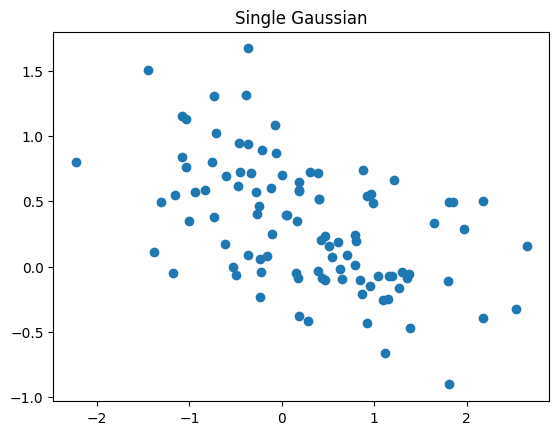



GMM


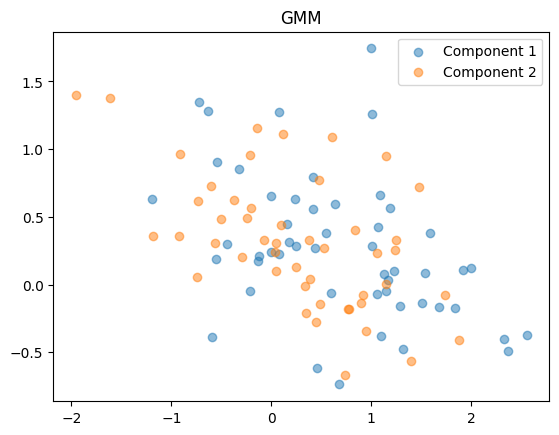

MMD with RBF kernel: 0.013780279177922239
MMD with IMQ kernel: 0.010974113743932201


KDE


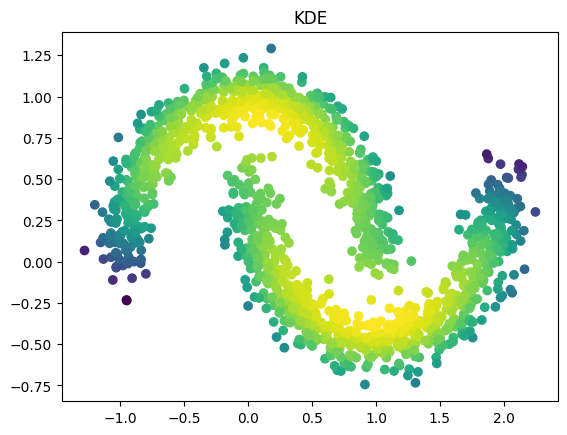

MMD with RBF kernel: 0.0015004247231604761
MMD with IMQ kernel: 0.0011231147126650187


In [149]:
training_set_sizes = [100, 500, 1500]
test_data, _= make_moons(n_samples=1000, noise=0.1)

def plot_data(data):
    plt.scatter(data[:,0], data[:,1])
    plt.title('Original data')
    plt.show()

plot_data(test_data)
for training_set_size in training_set_sizes:
    train, _ = make_moons(n_samples=training_set_size, noise=0.1)
    
    print('\n\nTraining set size:', training_set_size)

    # 2d Histogram
    print('\n\n2d Histogram')
    hist, xedges, yedges = two_dim_hist(train, 10)
    generated_data_hist = two_dim_hist_generate_data(hist, xedges, yedges)
    mmd_hist_rbf = mmd(train, generated_data_hist)
    mmd_hist_imq = mmd(train, generated_data_hist, kernel='imq')
    print('MMD with RBF kernel:', mmd_hist_rbf)
    print('MMD with IMQ kernel:', mmd_hist_imq)
    plot_hist(hist, xedges, yedges)
   

    # Single Gaussian
    print('\n\nSingle Gaussian')
    mean, cov = single_gaussian(train)
    generated_data_single_gaussian = single_gaussian_generate_data(mean, cov, training_set_size)
    mmd_single_gaussian_rbf = mmd(train, generated_data_single_gaussian)
    mmd_single_gaussian_imq = mmd(train,generated_data_single_gaussian, kernel='imq')
    gaussian_pdf = single_gaussian_pdf(train, mean, cov)
    print('MMD with RBF kernel:', mmd_single_gaussian_rbf)
    print('MMD with IMQ kernel:', mmd_single_gaussian_imq)
    plot_gaussian(mean, cov, 100)
    
    # GMM
    print('\n\nGMM')
    weights, means, covs = gmm(train, 2)
    generated_data_gmm = gmm_generate_data(weights, means, covs, training_set_size)
    plot_gmm(weights, means, covs, 100)
    mmd_gmm_rbf = mmd(train, generated_data_gmm)
    mmd_gmm_imq = mmd(train, generated_data_gmm, kernel='imq')
    print('MMD with RBF kernel:', mmd_gmm_rbf)
    print('MMD with IMQ kernel:', mmd_gmm_imq)
    

    # KDE
    print('\n\nKDE')
    h = 0.1
    pdf = kde(train, h)
    generated_data_kde = kde_generate_data(train, pdf, training_set_size)
    plot_kde(train, pdf)
    mmd_kde_rbf = mmd(train, generated_data_kde)
    mmd_kde_imq = mmd(train, generated_data_kde, kernel='imq')
    print('MMD with RBF kernel:', mmd_kde_rbf)
    print('MMD with IMQ kernel:', mmd_kde_imq)
    
    

    

    
    
    
    


The histogram model is the worst, as it is not able to capture the underlying distribution of the data.

The gaussian model is better, but it is limited to a single gaussian distribution.

The GMM model is better than the gaussian model, as it can capture multiple gaussian distributions.

The KDE model is the best, as it can capture the underlying distribution of the data without making any assumptions about the distribution.

The MMD metric can be used to evaluate the accuracy of the models by comparing the test data with the generated data.

The MMD values for the histogram, gaussian, GMM, and KDE models are very small, which indicates that the models are accurate. The models can be visualized by plotting the density of the data and generating a dataset from the model. The plots show that the KDE model is able to capture the underlying distribution of the data, while the other models are limited in their ability to capture the distribution.

### TASK 2


MMD for Histogram model: 0.0042
MMD for Gaussian model: 0.0016
MMD for GMM model: 0.00156
MMD for KDE model: 0.00156
Approximate recognizability accuracy for 2D Histogram: 0.0990
Approximate recognizability accuracy for Single Gaussian: 0.0870
Approximate recognizability accuracy for GMM: 0.0980
Approximate recognizability accuracy for KDE: 0.1080


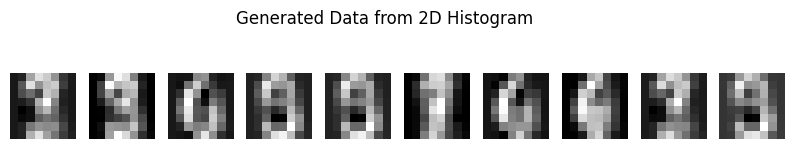

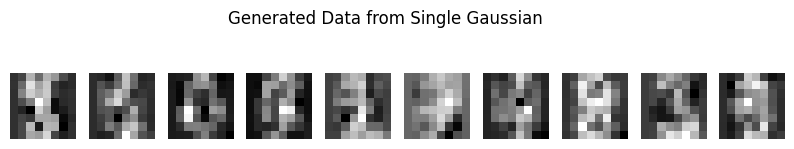

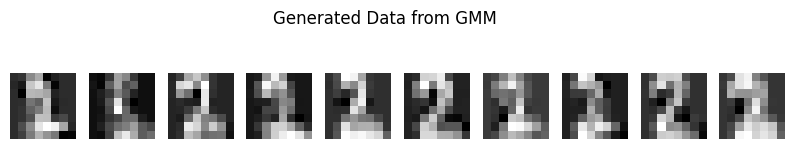

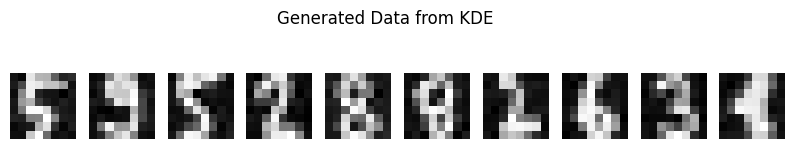

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Load the digits dataset
digits = load_digits()
x_digits, y_digits = digits.data, digits.target

# Reduce dimensionality to 2 from 64 for 2-D histogram
pca = PCA(n_components=2)
x_digits_2d = pca.fit_transform(x_digits)


# Define histogram bin size as a hyperparameter
def fit_2d_histogram(x, bin_size):
    hist, edges = np.histogramdd(x, bins=[bin_size] * x.shape[1], density=True)
    return hist, edges

def generate_histogram_samples(histogram, edges, n_samples):
    dim = histogram.ndim
    samples = []

    # Normalize the histogram to get probabilities
    histogram_probs = histogram / histogram.sum()

    for _ in range(n_samples):
        sample = []
        for d in range(dim):
            # Marginalize histogram along all other dimensions
            marginal_probs = histogram_probs.sum(axis=tuple(i for i in range(dim) if i != d))

            # Normalize marginal probabilities to sum to 1
            marginal_probs /= marginal_probs.sum()

            # Choose a bin based on the marginal probabilities
            bin_idx = np.random.choice(len(edges[d]) - 1, p=marginal_probs)

            # Sample uniformly within the chosen bin
            sample.append(np.random.uniform(edges[d][bin_idx], edges[d][bin_idx + 1]))

        samples.append(sample)
    return np.array(samples)


# histogram with bin size
histogram, edges = fit_2d_histogram(x_digits_2d, bin_size=10)

# Evaluate MMD for histogram model
generated_histogram_data_2d = generate_histogram_samples(histogram, edges, n_samples=1000)
# Map 2D samples back to the original 64D space using the inverse PCA transform
generated_histogram_data_64d = pca.inverse_transform(generated_histogram_data_2d)

# Single Gaussian
mean = np.mean(x_digits, axis=0)
covariance = np.cov(x_digits, rowvar=False)

def generate_gaussian_samples(mean, covariance, n_samples):
    return np.random.multivariate_normal(mean, covariance, n_samples)


# data from single Gaussian model
generated_data_gaussian = generate_gaussian_samples(mean, covariance, n_samples=1000)


# Function to compute MMD using squared exponential kernel
def squared_exponential_kernel(data1, data2, sigma=1.0):
    return np.exp(-cdist(data1, data2, 'sqeuclidean') / (2 * sigma ** 2))

def mmd(data1, data2, kernel_func):
    K11 = kernel_func(data1, data1).mean()
    K22 = kernel_func(data2, data2).mean()
    K12 = kernel_func(data1, data2).mean()
    return K11 + K22 - 2 * K12

# Fit GMM with n_components
def fit_gmm(data, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data)
    return gmm

# Fit KDE with bandwidth
def fit_kde(data, bandwidth):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data)
    return kde

# Generate samples from GMM
def sample_from_gmm(gmm, n_samples):
    return gmm.sample(n_samples)[0]

# Generate samples from KDE
def sample_from_kde(kde, n_samples):
    samples = kde.sample(n_samples)
    return samples

# Fit GMM and KDE to the original data
gmm = fit_gmm(x_digits, n_components=10)
kde = fit_kde(x_digits, bandwidth=0.5)

# Generate samples from GMM and KDE
generated_data_gmm = sample_from_gmm(gmm, n_samples=1000)
generated_data_kde = sample_from_kde(kde, n_samples=1000)

# MMD evaluations
mmd_histogram = mmd(x_digits, generated_histogram_data_64d, squared_exponential_kernel)
mmd_gaussian = mmd(x_digits, generated_data_gaussian, squared_exponential_kernel)
mmd_gmm = mmd(x_digits, generated_data_gmm, squared_exponential_kernel)
mmd_kde = mmd(x_digits, generated_data_kde, squared_exponential_kernel)

print(f"MMD for Histogram model: {mmd_histogram:.4f}")
print(f"MMD for Gaussian model: {mmd_gaussian:.4f}")
print(f"MMD for GMM model: {mmd_gmm:.5f}")
print(f"MMD for KDE model: {mmd_kde:.5f}")


# Train Random Forest Classifier on the dataset
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, train_size=0.75, random_state=0)

def train_random_forest(X, y):
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X, y)
    return clf

# Train a RandomForestClassifier on the original dataset
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train, y_train)

# Evaluate accuracy of generated samples
def evaluate(model_name, generated_data):
    labels_pred = rf_classifier.predict(generated_data)
    accuracy = accuracy_score(y_digits[:len(labels_pred)], labels_pred)
    print(f"Approximate recognizability accuracy for {model_name}: {accuracy:.4f}")

# Evaluate the recognizability of generated data
evaluate("2D Histogram", generated_histogram_data_64d)
evaluate("Single Gaussian", generated_data_gaussian)
evaluate("GMM", generated_data_gmm)
evaluate("KDE", generated_data_kde)


# To plot generated samples
def plot_generated_digits(data, title="Generated Data"):
    n = min(10, data.shape[0])
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(data[i].reshape(8, 8), cmap="gray")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_generated_digits(generated_histogram_data_64d, "Generated Data from 2D Histogram")
plot_generated_digits(generated_data_gaussian, "Generated Data from Single Gaussian")
plot_generated_digits(generated_data_gmm, "Generated Data from GMM")
plot_generated_digits(generated_data_kde, "Generated Data from KDE")
